In [1]:
import numpy as np
import pandas as pd
import scipy.io
import os
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import preprocessing
import sys
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
szrs=np.random.binomial(n_subs_per_group,p_szr)
type(szrs)
print(szrs)

3


In [11]:
n_subs=20
n_subs_per_group=int(n_subs/2)
n_sim=1000000
p_szr=.3
p_stop=.5
n_szrs=np.zeros(n_sim)
for sim_ct in range(n_sim):
    szr=np.random.binomial(1,p_szr)
    if np.random.binomial(1,1-p_stop):
        n_szrs[sim_ct]=szr
print(np.mean(n_szrs))
print((1-p_stop)*p_szr)

0.150364
0.15


In [67]:
# Try one set of p_szr p_stop parameters
n_subs=20
n_subs_per_group=int(n_subs/2)
n_sim=10000
p_szr=0.5
p_stop=1.0
p_combo=p_szr*(1-p_stop)
n_szrs_stim_group=np.zeros(n_sim)
n_szrs_control_group=np.zeros(n_sim)
reject_null=np.zeros(n_sim)
p_fisher=np.zeros(n_sim)
p_t=np.zeros(n_sim)
for sim_ct in range(n_sim):
    n_szrs_stim_group[sim_ct]=np.random.binomial(n_subs_per_group,p_combo)
    n_szrs_control_group[sim_ct]=np.random.binomial(n_subs_per_group,p_szr)
    oddsratio, pvalue = stats.fisher_exact([[n_szrs_stim_group[sim_ct], n_subs_per_group-n_szrs_stim_group[sim_ct]], 
                                            [n_szrs_control_group[sim_ct], n_subs_per_group-n_szrs_control_group[sim_ct]]],alternative='less')
    reject_null[sim_ct]=pvalue<0.05
    p_fisher[sim_ct]=pvalue
    
    # Ind samp t-test (not as appropriate, but should be similar with enough patients)
    temp_stim=np.zeros(n_subs_per_group)
    temp_ctrl=np.zeros(n_subs_per_group)
    temp_stim[:int(n_szrs_stim_group[sim_ct])]=1
    temp_ctrl[:int(n_szrs_control_group[sim_ct])]=1
    t, p_t[sim_ct]=scipy.stats.ttest_ind(temp_stim, temp_ctrl) #NOTE THIS IS ONE TAILED!!!

reject_null_t=p_t<0.05
print('Stim group: mean (SD) # of szrs: %f (%f)' % (np.mean(n_szrs_stim_group),np.std(n_szrs_stim_group)))
print('Control group: mean (SD) # of szrs: %f (%f)' % (np.mean(n_szrs_control_group),np.std(n_szrs_control_group)))
print('Fisher Power (SE): %f (%f)' % (np.mean(reject_null),np.std(reject_null)/np.sqrt(n_sim)))
print('t Power (SE): %f (%f)' % (np.mean(reject_null_t),np.std(reject_null_t)/np.sqrt(n_sim)))

Stim group: mean (SD) # of szrs: 0.000000 (0.000000)
Control group: mean (SD) # of szrs: 5.005600 (1.590273)
Fisher Power (SE): 0.826000 (0.003791)
t Power (SE): 0.826000 (0.003791)


/home/dgroppe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in less


In [77]:
for ct, p_szr in enumerate(np.arange(0,1+dlt,dlt)):
    for p_stop in np.arange(0,1+dlt,dlt):
        print('%d p_szr, p_stop: %f, %f' % (ct, p_szr, p_stop))

0 p_szr, p_stop: 0.000000, 0.000000
0 p_szr, p_stop: 0.000000, 0.100000
0 p_szr, p_stop: 0.000000, 0.200000
0 p_szr, p_stop: 0.000000, 0.300000
0 p_szr, p_stop: 0.000000, 0.400000
0 p_szr, p_stop: 0.000000, 0.500000
0 p_szr, p_stop: 0.000000, 0.600000
0 p_szr, p_stop: 0.000000, 0.700000
0 p_szr, p_stop: 0.000000, 0.800000
0 p_szr, p_stop: 0.000000, 0.900000
0 p_szr, p_stop: 0.000000, 1.000000
1 p_szr, p_stop: 0.100000, 0.000000
1 p_szr, p_stop: 0.100000, 0.100000
1 p_szr, p_stop: 0.100000, 0.200000
1 p_szr, p_stop: 0.100000, 0.300000
1 p_szr, p_stop: 0.100000, 0.400000
1 p_szr, p_stop: 0.100000, 0.500000
1 p_szr, p_stop: 0.100000, 0.600000
1 p_szr, p_stop: 0.100000, 0.700000
1 p_szr, p_stop: 0.100000, 0.800000
1 p_szr, p_stop: 0.100000, 0.900000
1 p_szr, p_stop: 0.100000, 1.000000
2 p_szr, p_stop: 0.200000, 0.000000
2 p_szr, p_stop: 0.200000, 0.100000
2 p_szr, p_stop: 0.200000, 0.200000
2 p_szr, p_stop: 0.200000, 0.300000
2 p_szr, p_stop: 0.200000, 0.400000
2 p_szr, p_stop: 0.200000, 0

In [ ]:
# Try multiple sets of p_szr p_stop parameters
n_subs=20
n_subs_per_group=int(n_subs/2)
n_sim=100
dlt=0.1
try_p=np.arange(0,1+dlt,dlt)
n_szrs_stim_group=np.zeros(n_sim)
n_szrs_control_group=np.zeros(n_sim)
reject_null=np.zeros(n_sim)
p_fisher=np.zeros(n_sim)
p_t=np.zeros(n_sim)
for p_szr_ct, p_szr in enumerate(try_p):
    for p_stop_ct, p_stop in enumerate(try_p):
        p_combo=p_szr*(1-p_stop)
        for sim_ct in range(n_sim):
            n_szrs_stim_group[sim_ct]=np.random.binomial(n_subs_per_group,p_combo)
            n_szrs_control_group[sim_ct]=np.random.binomial(n_subs_per_group,p_szr)
            oddsratio, pvalue = stats.fisher_exact([[n_szrs_stim_group[sim_ct], n_subs_per_group-n_szrs_stim_group[sim_ct]], 
                                            [n_szrs_control_group[sim_ct], n_subs_per_group-n_szrs_control_group[sim_ct]]],alternative='less')
            reject_null[sim_ct]=pvalue<0.05
            p_fisher[sim_ct]=pvalue
    
            # Ind samp t-test (not as appropriate, but should be similar with enough patients)
            temp_stim=np.zeros(n_subs_per_group)
            temp_ctrl=np.zeros(n_subs_per_group)
            temp_stim[:int(n_szrs_stim_group[sim_ct])]=1
            temp_ctrl[:int(n_szrs_control_group[sim_ct])]=1
            t, p_t[sim_ct]=scipy.stats.ttest_ind(temp_stim, temp_ctrl) #NOTE THIS IS ONE TAILED!!!
TODO add counts to pvals and preallocate mem
            
reject_null_t=p_t<0.05
print('Stim group: mean (SD) # of szrs: %f (%f)' % (np.mean(n_szrs_stim_group),np.std(n_szrs_stim_group)))
print('Control group: mean (SD) # of szrs: %f (%f)' % (np.mean(n_szrs_control_group),np.std(n_szrs_control_group)))
print('Fisher Power (SE): %f (%f)' % (np.mean(reject_null),np.std(reject_null)/np.sqrt(n_sim)))
print('t Power (SE): %f (%f)' % (np.mean(reject_null_t),np.std(reject_null_t)/np.sqrt(n_sim)))

In [45]:
np.mean(reject_null)

0.14199999999999999

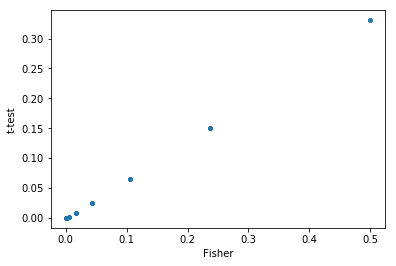

In [57]:
plt.figure()
plt.plot(p_fisher,p_t,'.')
plt.xlabel('Fisher')
plt.ylabel('t-test')

In [20]:
pvalue

0.33935629587803351

In [27]:
oddsratio, pvalue = stats.fisher_exact([[1,11],
                                        [9,3]])
print(pvalue)

0.00275945618522


In [28]:
oddsratio, pvalue = stats.fisher_exact([[1,9],
                                        [11,3]])
print(pvalue)

0.00275945618522


In [65]:
oddsratio, pvalue = stats.fisher_exact([[12,7],
                                        [2,9]],alternative='greater')
print(pvalue)

0.0211894052974


In [66]:
oddsratio, pvalue = stats.fisher_exact([[12,7],
                                        [2,9]])
print(pvalue)

0.0258870564718


In [54]:
stats.fisher_exact?